In [3]:
# Importing libraries

import numpy as np
import pandas as pd
import IPython.display as display

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt

%matplotlib inline

# 'Seaborn' is a data visualization library
import seaborn as sns

import warnings  # to avoid warnings
warnings.filterwarnings('ignore')

In [4]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# Set the plot size
plt.rcParams['figure.figsize'] = [12, 8] 

In [5]:
# Read the dataset from the specified file path
df = pd.read_csv("Marketing campaign dataset.csv", low_memory=False)

# Display the first 5 rows of the dataframe
df.head(5)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,837,8,SGD,SGD,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2634,44,SGD,SGD,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2135,32,SGD,SGD,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,400.0,SGD,64,Video,NaN,0.0,652.173913,2327,48,SGD,SGD,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,1538,20,SGD,SGD,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [6]:
# no of rows and columns 
df.shape

(72612, 35)

In [7]:
#clumns in dataset 
df.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [8]:
#type for each columns in datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [9]:
# Calculate the total count of missing values for each variable
total_missing = df.isnull().sum()

# Calculate the percentage of missing values for each variable
percent_missing = (total_missing * 100) / df.isnull().count()
percent_missing = percent_missing.round(decimals=0)  # Round the percentage values

# Create a DataFrame to store the missing data information
missing_data = pd.DataFrame({
    'Total': total_missing,
    'Percentage of Missing Values': percent_missing,
    'Type': df.dtypes
})

# Sort the DataFrame based on the total count of missing values in descending order
missing_data = missing_data.sort_values(by='Total', ascending=False)

missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.0,float64
total_reach,72612,100.0,float64
position_in_content,72612,100.0,float64
max_bid_cpm,65206,90.0,float64
creative_width,3412,5.0,float64
creative_height,3412,5.0,float64
template_id,3412,5.0,float64
approved_budget,406,1.0,float64
exchange_rate,0,0.0,int64
clicks,0,0.0,int64


In [10]:
# filling missing values with 0 for following columns 

df['creative_width'].fillna(0, inplace=True)
df['creative_height'].fillna(0, inplace=True)
df['template_id'].fillna(0, inplace=True)
df['approved_budget'].fillna(0, inplace=True)

In [11]:
df.drop(columns=['position_in_content','unique_reach','total_reach','max_bid_cpm'],inplace=True)

In [12]:
# summery statistics 

df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd
count,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,7.261200e+04,72612.000000,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000
mean,3130.143282,27.036344,49.449127,7450.124842,255.226409,212.688674,79.178648,6195.862213,345.272861,1.251030e+05,21.847780,0.0,617.630284,1370.161847,52.696386,1.0,11.819999
std,142.154918,25.479175,55.881324,4062.384982,106.899767,89.083139,26.894586,387.864576,23.707191,5.611237e+05,23.759286,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,0.000000,4756.000000,188.000000,0.000000e+00,1.000000,0.0,2.452316,511.000000,2.000000,1.0,0.000000
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,4.000000,0.0,205.994550,526.000000,5.000000,1.0,0.435791
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,8.000000,0.0,377.656676,577.000000,8.000000,1.0,1.709001
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,32.000000,0.0,755.313351,816.000000,13.000000,1.0,8.276369
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,64.000000,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945


In [13]:
#CTR

df['ctr']=(df['clicks']/df['impressions'])*100

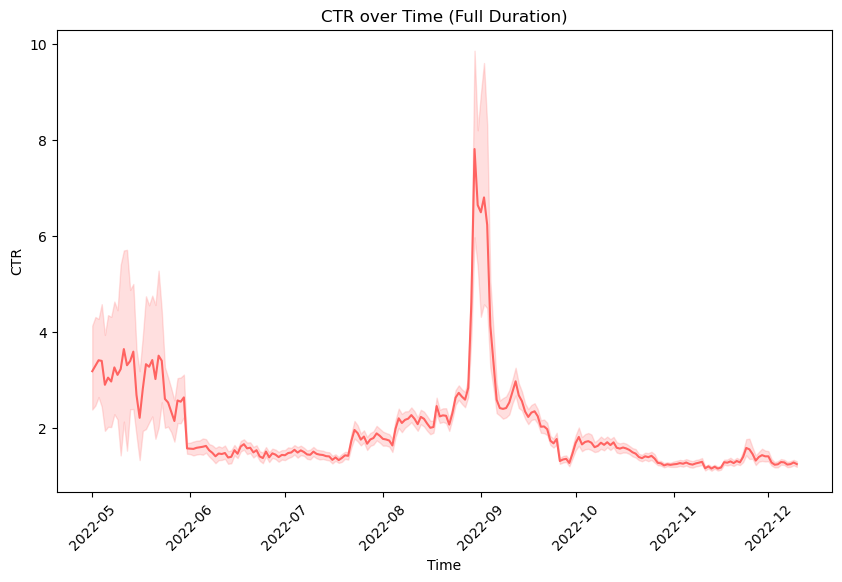

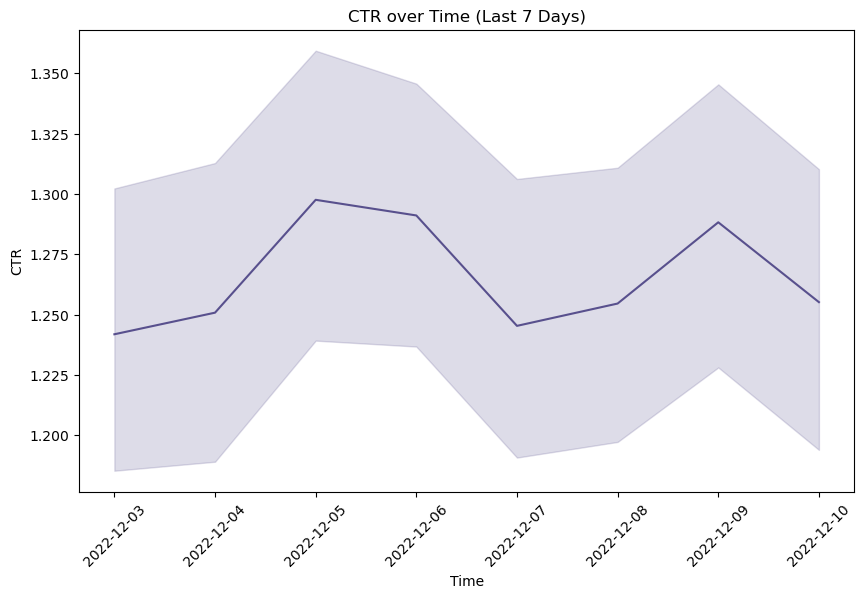

In [14]:
import pandas as pd

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='ctr', data=df, color='#FF6361')
plt.title('CTR over Time (Full Duration)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)

# CTR over last 7 days
last_7_days = pd.to_datetime(df['time'].max()) - pd.DateOffset(days=7)
df_last_7_days = df[df['time'] >= last_7_days]

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='ctr', data=df_last_7_days, color='#58508D')
plt.title('CTR over Time (Last 7 Days)')
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)

plt.show()

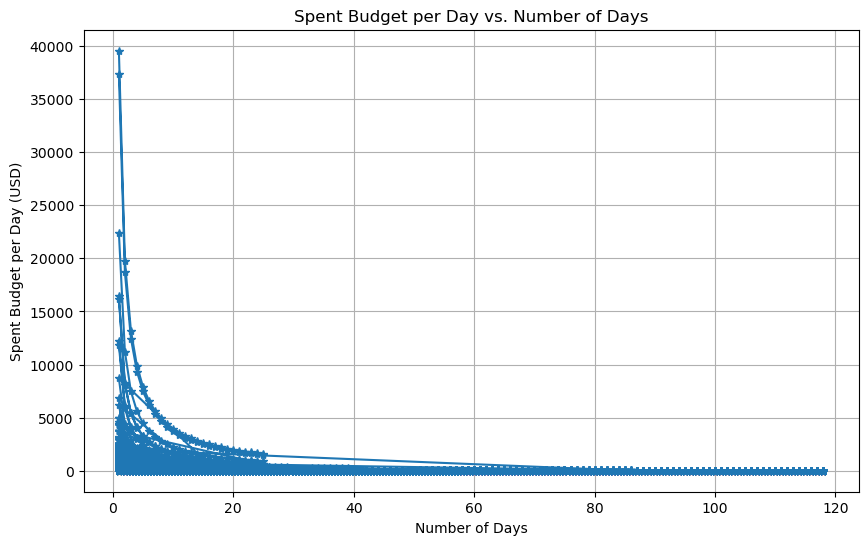

In [15]:
# compare the spent budget with the number of days

df['spent_budget_per_day'] = df['campaign_budget_usd'] / df['no_of_days']

plt.figure(figsize=(10, 6))
plt.plot(df['no_of_days'], df['spent_budget_per_day'], marker='*')
plt.xlabel("Number of Days")
plt.ylabel("Spent Budget per Day (USD)")
plt.title("Spent Budget per Day vs. Number of Days")
plt.grid(True)
plt.show()

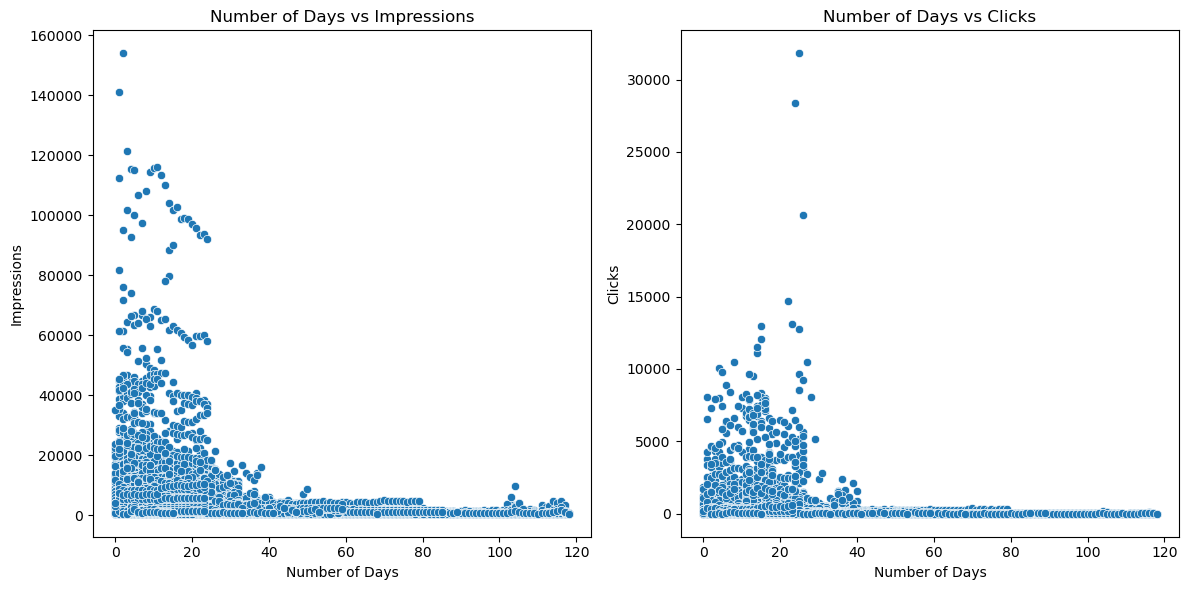

In [17]:
# checking scatter plots for no of days v/s impressions

# Create subplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot: no_of_days vs impressions
sns.scatterplot(data=df, x="no_of_days", y="impressions", ax=axes[0])
axes[0].set_xlabel("Number of Days")
axes[0].set_ylabel("Impressions")
axes[0].set_title("Number of Days vs Impressions")

# Scatter plot: no_of_days vs clicks
sns.scatterplot(data=df, x="no_of_days", y="clicks", ax=axes[1])
axes[1].set_xlabel("Number of Days")
axes[1].set_ylabel("Clicks")
axes[1].set_title("Number of Days vs Clicks")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

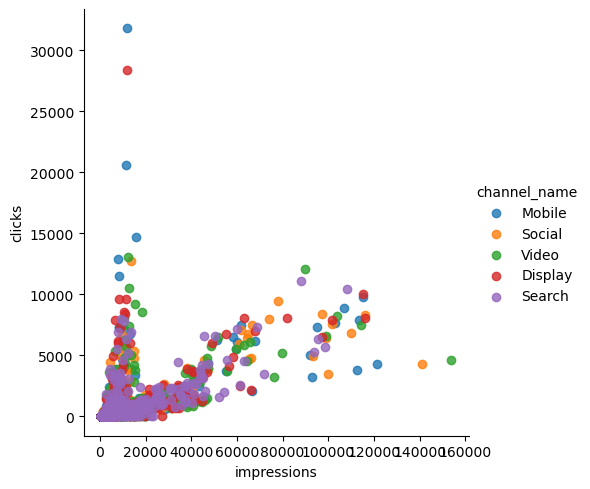

In [18]:
#checking impressions and click with channel distributions 
sns.lmplot(x = "impressions", y = "clicks", data = df, fit_reg=False, hue='channel_name')

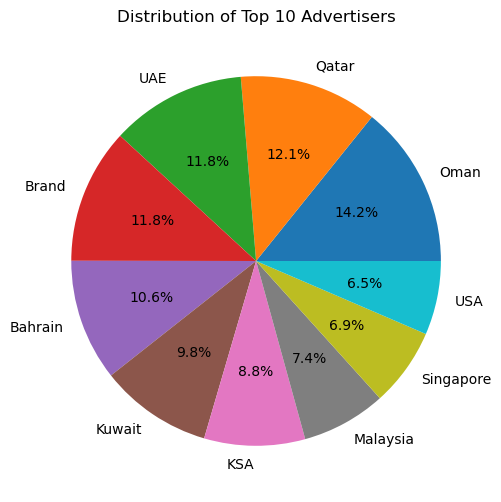

In [19]:
# pie chart to see top 10 
# Calculate the count of each category in the 'advertiser_name' column
counts = df['advertiser_name'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Advertisers')
plt.show()

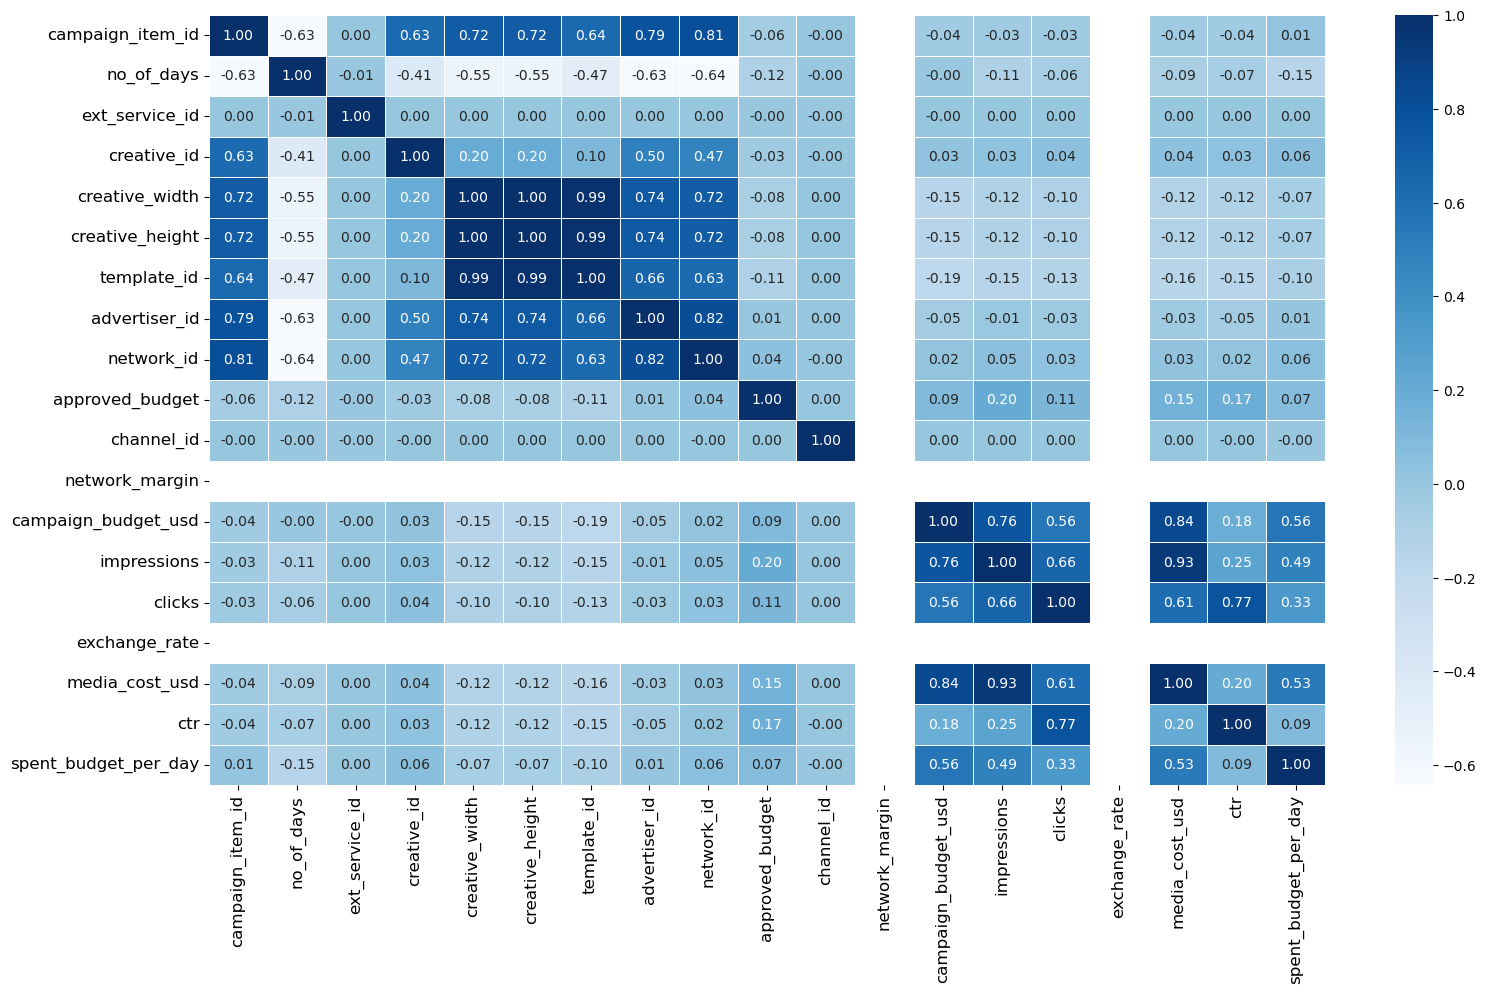

In [20]:
# checking correlations amongst them 

plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()